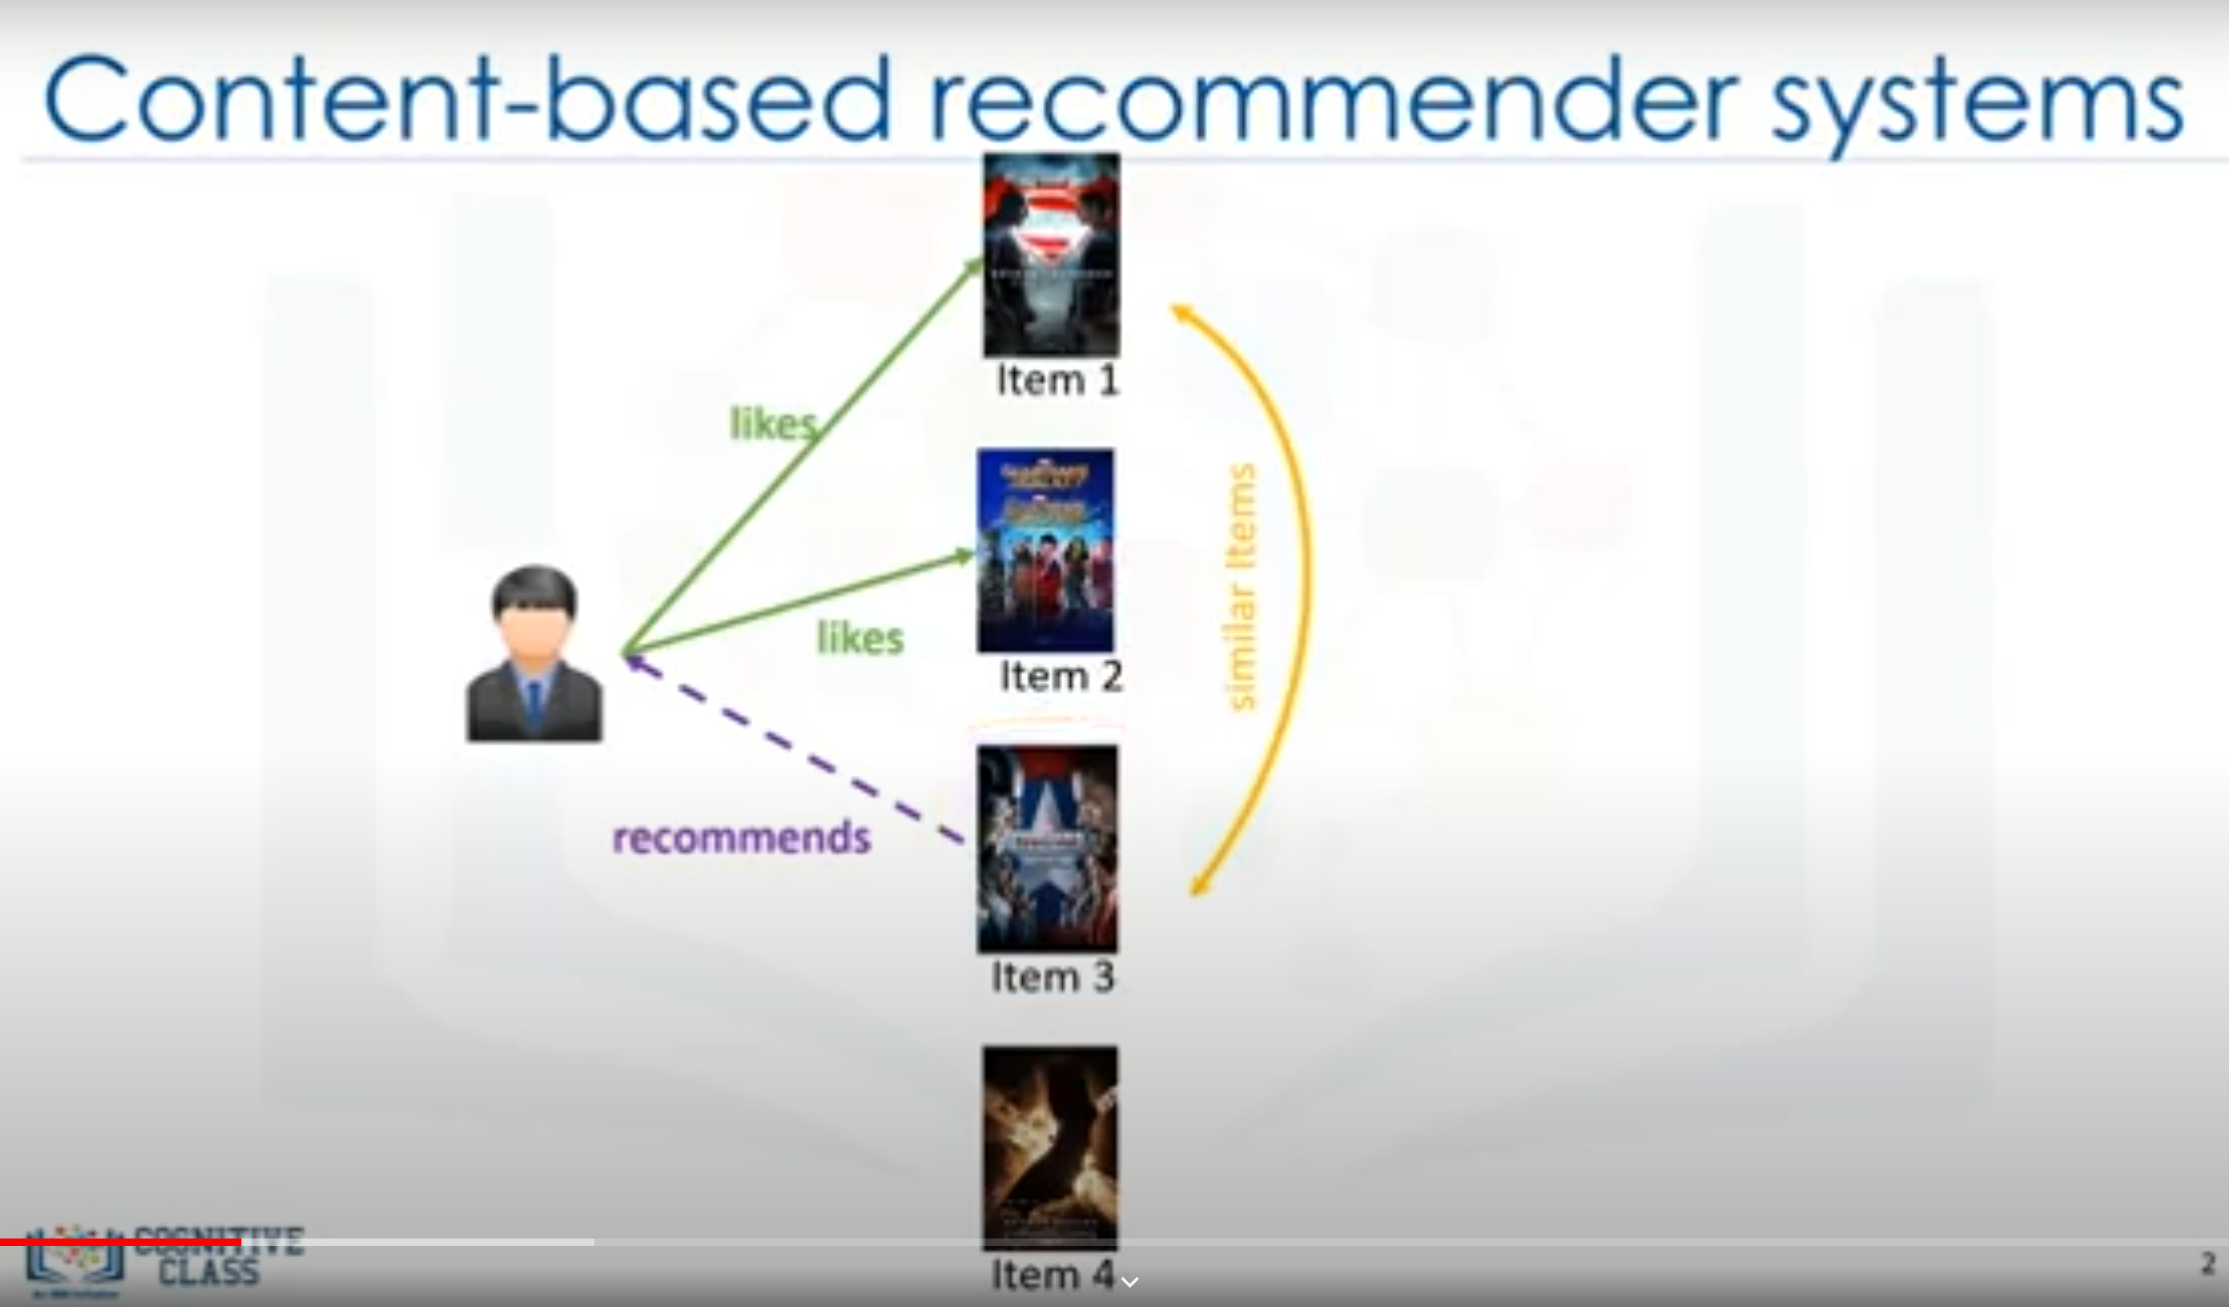
source: https://www.youtube.com/watch?v=YMZmLx-AUvY
<br>dataset: https://www.kaggle.com/datasets/thoughtvector/podcastreviews

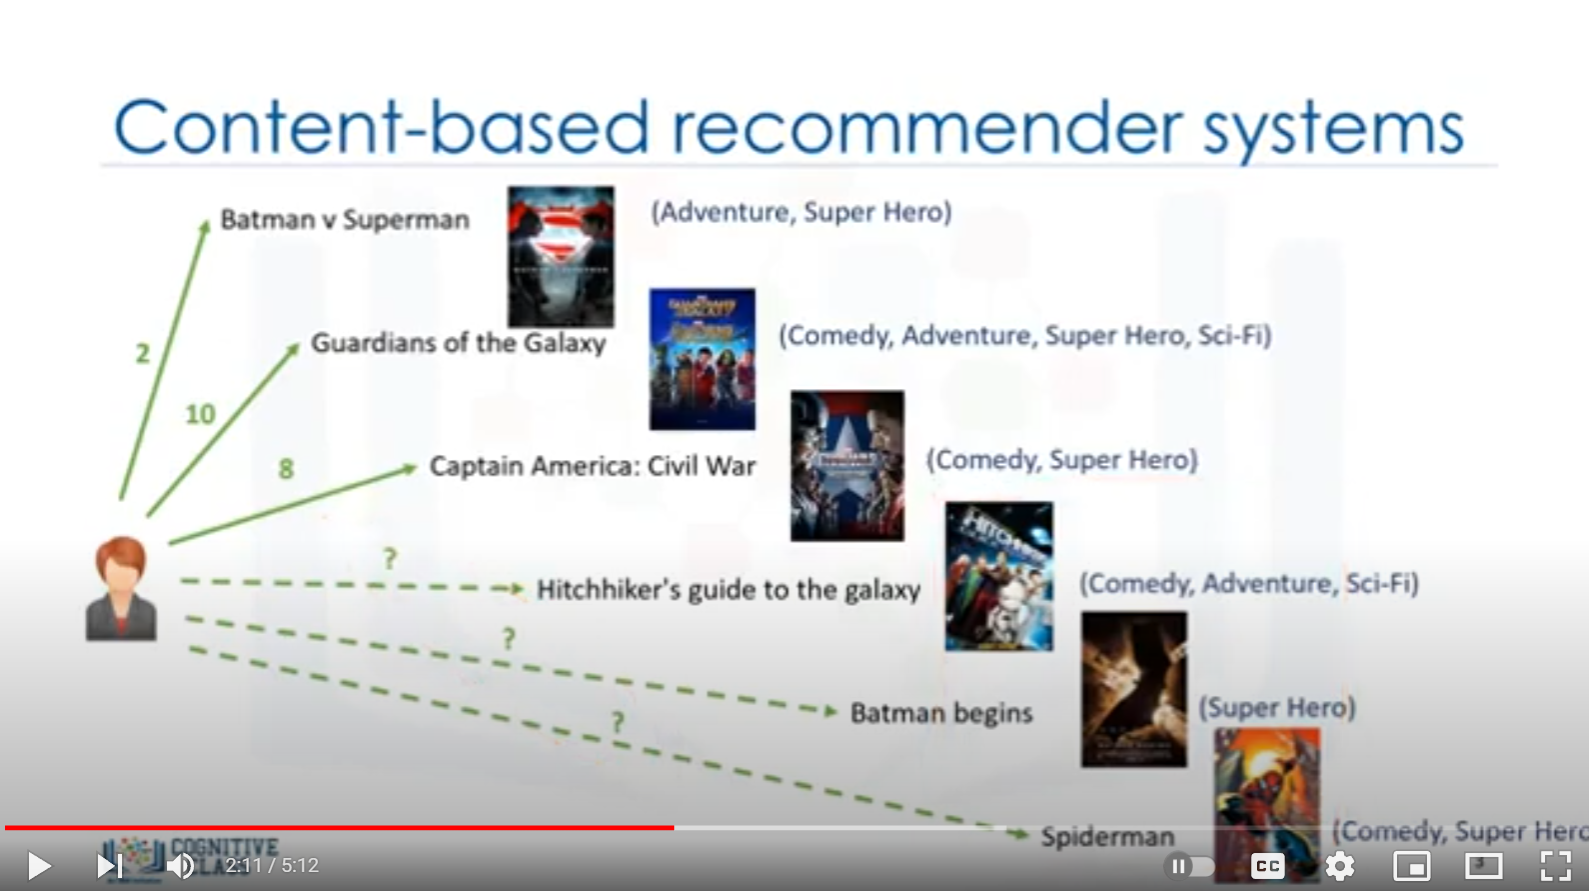

In [18]:
import pandas as pd
import numpy as np
import scipy.stats
import sqlite3
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import cosine_similarity

database = "database.sqlite"

In [42]:
# get users with more than K reviews from db
K = 5
reviews = pd.read_sql(f"""
    SELECT podcast_id, title as review_title, content as review_content, rating, author_id, created_at
    FROM reviews
    WHERE author_id IN
    (
        SELECT author_id
        FROM reviews
        GROUP BY (author_id)
        HAVING COUNT(*) > {K}
    )
""", sqlite3.connect(database))

# get podcasts with categories from db
podcast_w_category = pd.read_sql(f"""
    SELECT podcast_id, title as podcast_title, category
    FROM categories JOIN podcasts USING (podcast_id)
""", sqlite3.connect(database))

# join reviews with podcasts on podcast_id
rev_w_pod_w_cat = pd.merge(reviews, podcast_w_category, on='podcast_id', how='inner')

In [45]:
reviews.groupby('author_id').mean().tail(15)

rating
author_id                
FFC0EF8EB97403D  3.857143
FFC25AD61E777EE  3.750000
FFC2991D6A73DC1  3.727273
FFC7BC23627F950  5.000000
FFCC035A6DA5348  2.266667
FFCF81D2F495373  3.000000
FFCFBD5793B308D  4.666667
FFD5191874D5494  3.500000
FFD5BA32F614A43  5.000000
FFE3C28C3333962  5.000000
FFE6F75290CFE09  5.000000
FFE8592FBCBE112  2.625000
FFEE0B290529BDE  5.000000
FFEF1081D4828D2  5.000000
FFF6DDD7EC3F584  5.000000

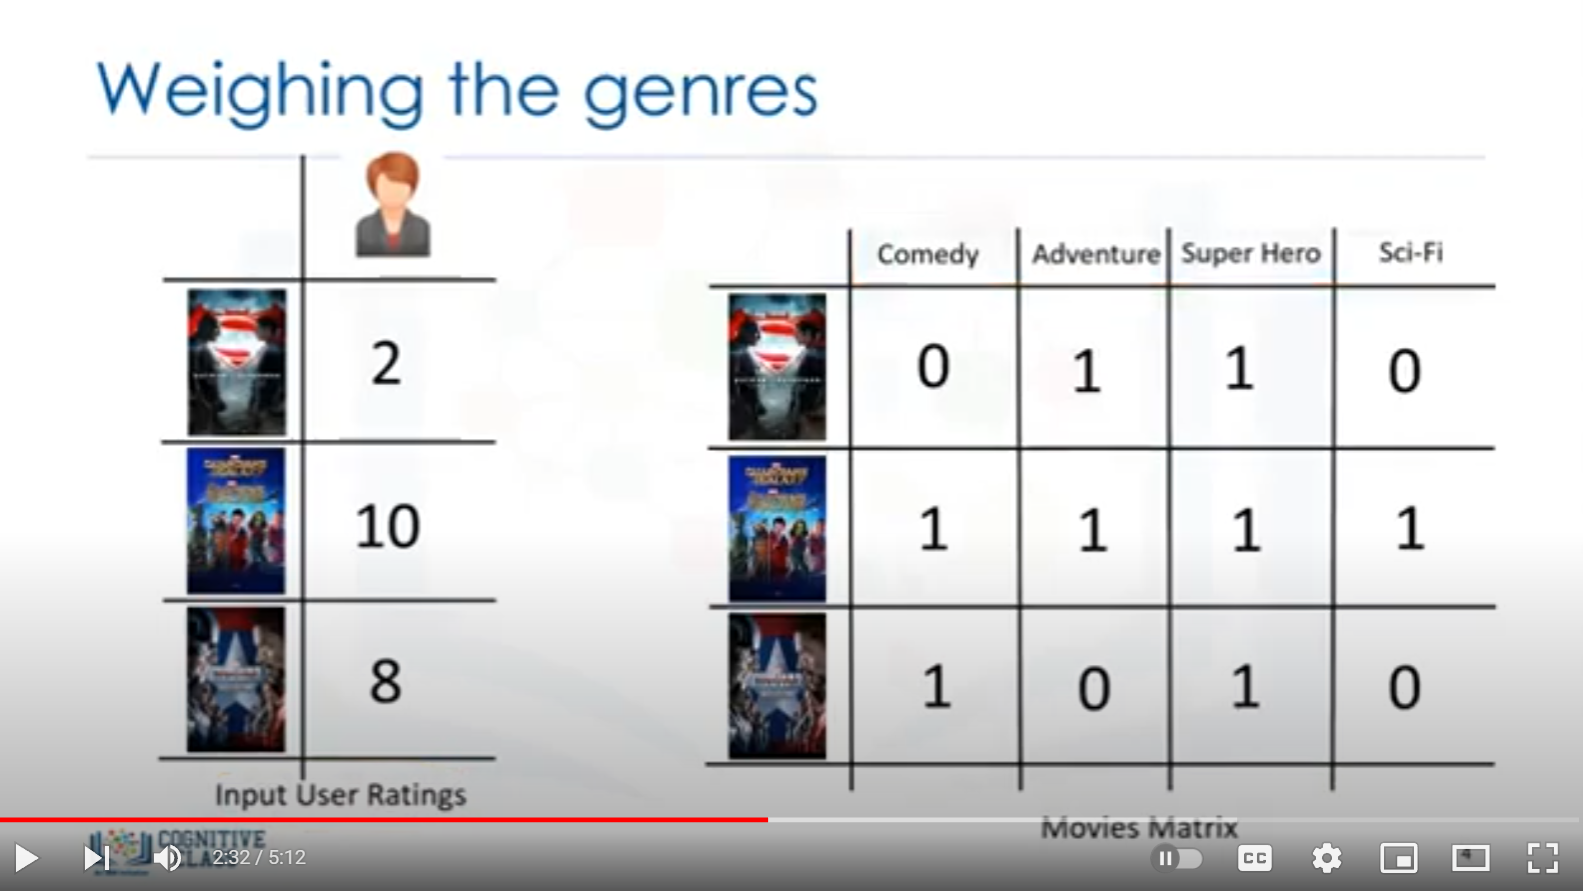

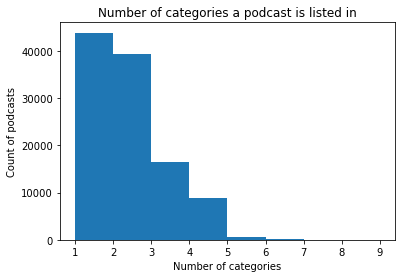

In [46]:
podcasts_matrix = pd.get_dummies(podcast_w_category.set_index('podcast_id').category)
podcasts_matrix = podcasts_matrix.reset_index().groupby('podcast_id').sum()
plt.hist(podcasts_matrix.sum(axis=1), bins=[1,2,3,4,5,6,7,8,9])
plt.title('Number of categories a podcast is listed in')
plt.ylabel('Count of podcasts')
plt.xlabel('Number of categories')
plt.show()

In [47]:
podcasts_matrix.head()

arts  arts-books  arts-design  \
podcast_id                                                        
a00018b54eb342567c94dacfb2a3e504     0           0            0   
a00043d34e734b09246d17dc5d56f63c     0           0            0   
a0004b1ef445af9dc84dad1e7821b1e3     0           0            0   
a00071f9aaae9ac725c3a586701abf4d     0           0            0   
a000aa69852b276565c4f5eb9cdd999b     1           0            0   

                                  arts-fashion-beauty  arts-food  \
podcast_id                                                         
a00018b54eb342567c94dacfb2a3e504                    0          0   
a00043d34e734b09246d17dc5d56f63c                    0          0   
a0004b1ef445af9dc84dad1e7821b1e3                    0          0   
a00071f9aaae9ac725c3a586701abf4d                    0          0   
a000aa69852b276565c4f5eb9cdd999b                    0          0   

                                  arts-performing-arts  arts-visual-arts  \
podcast_id                                                                 
a00018b54eb342567c94dacfb2a3e504                     0                 0   
a00043d34e734b09246d17dc5d56f63c                     0                 0   
a0004b1ef445af9dc84dad1e7821b1e3                     0                 0   
a00071f9aaae9ac725c3a586701abf4d                     0                 0   
a000aa69852b276565c4f5eb9cdd999b                     0                 0   

                                  buddhism  business  business-careers  ...  \
podcast_id                                                              ...   
a00018b54eb342567c94dacfb2a3e504         0         1                 0  ...   
a00043d34e734b09246d17dc5d56f63c         0         0                 0  ...   
a0004b1ef445af9dc84dad1e7821b1e3         0         0                 0  ...   
a00071f9aaae9ac725c3a586701abf4d         0         1                 0  ...   
a000aa69852b276565c4f5eb9cdd999b         0         0                 0  ...   

                                  sports-wilderness  sports-wrestling  \
podcast_id                                                              
a00018b54eb342567c94dacfb2a3e504                  0                 0   
a00043d34e734b09246d17dc5d56f63c                  0                 0   
a0004b1ef445af9dc84dad1e7821b1e3                  0                 0   
a00071f9aaae9ac725c3a586701abf4d                  0                 0   
a000aa69852b276565c4f5eb9cdd999b                  0                 0   

                                  technology  true-crime  tv-film  \
podcast_id                                                          
a00018b54eb342567c94dacfb2a3e504           0           0        0   
a00043d34e734b09246d17dc5d56f63c           0           0        0   
a0004b1ef445af9dc84dad1e7821b1e3           0           0        0   
a00071f9aaae9ac725c3a586701abf4d           0           0        0   
a000aa69852b276565c4f5eb9cdd999b           0           0        0   

                                  tv-film-after-shows  tv-film-film-history  \
podcast_id                                                                    
a00018b54eb342567c94dacfb2a3e504                    0                     0   
a00043d34e734b09246d17dc5d56f63c                    0                     0   
a0004b1ef445af9dc84dad1e7821b1e3                    0                     0   
a00071f9aaae9ac725c3a586701abf4d                    0                     0   
a000aa69852b276565c4f5eb9cdd999b                    0                     0   

                                  tv-film-film-interviews  \
podcast_id                                                  
a00018b54eb342567c94dacfb2a3e504                        0   
a00043d34e734b09246d17dc5d56f63c                        0   
a0004b1ef445af9dc84dad1e7821b1e3                        0   
a00071f9aaae9ac725c3a586701abf4d                        0   
a000aa69852b276565c4f5eb9cdd999b                        0   

                      

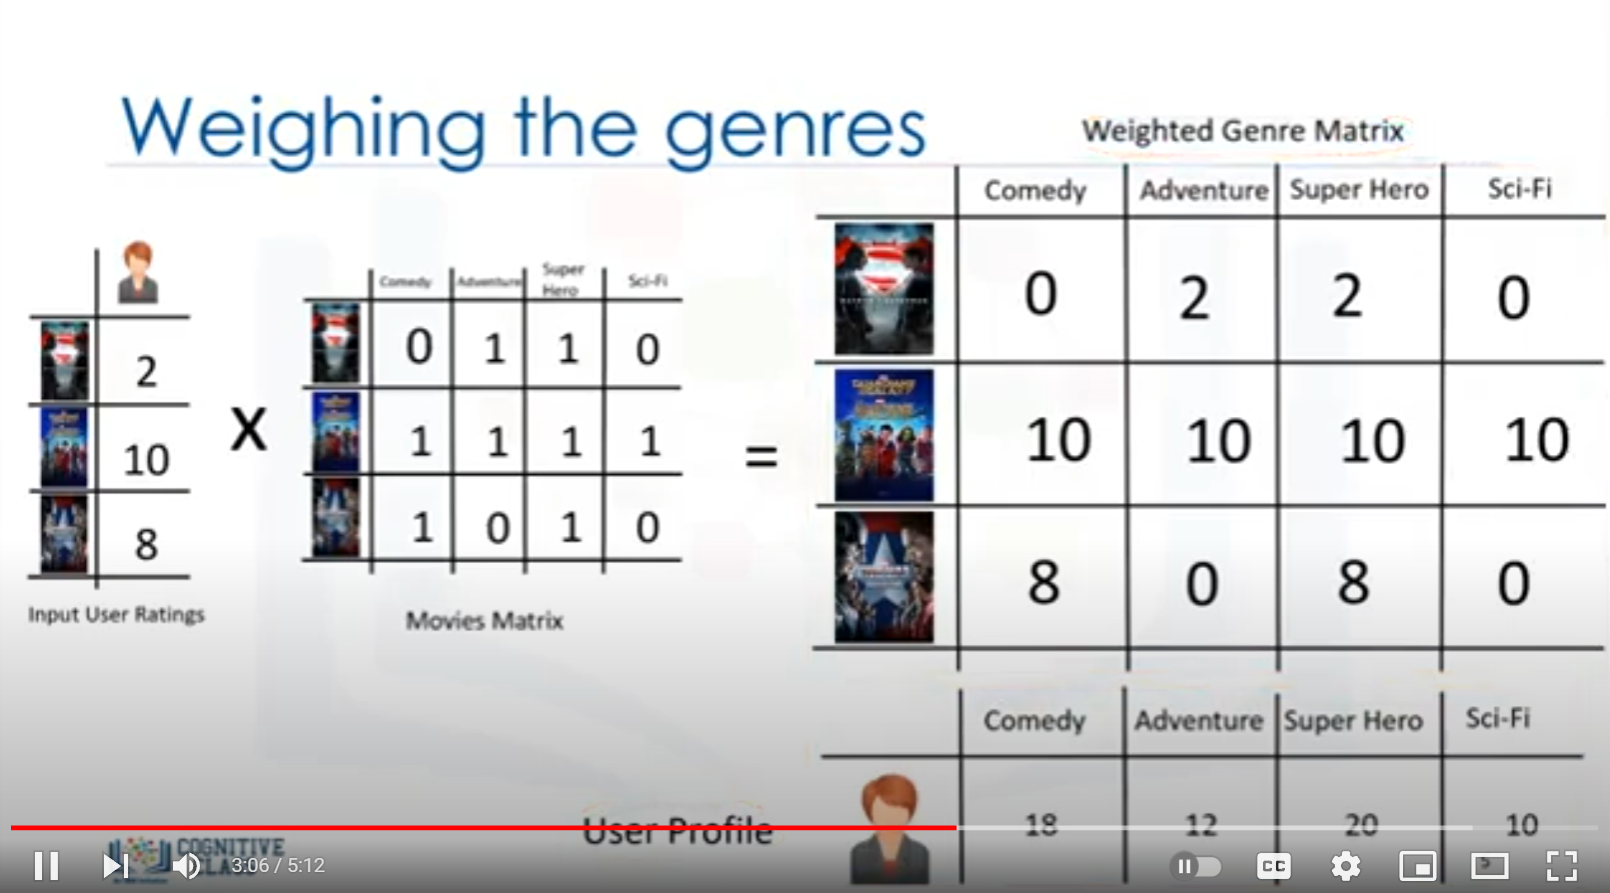

In [48]:
#select the user and the corresponding ratings
user_id = 'FFC2991D6A73DC1'
input_user_ratings = reviews.query(f"author_id == '{user_id}'").set_index('podcast_id')[['rating']]

#average out ratings for the cases where a user rates the same podcast multiple times
input_user_ratings = input_user_ratings.reset_index().groupby('podcast_id').mean()
input_user_ratings

rating
podcast_id                              
b3ce53d10d4db9f7b72dc16ad483b782     4.0
bb4198dd33ac806aa269c39520e28577     5.0
c0c71170ea71ffe20753bf6bc7e03d9e     5.0
c1028660007a43cb9983b81e85f3646a     5.0
c4f6ee92e48accf5e33c2c8fb8857830     2.0
e054ccd66e08e18eb58fb0a9a6f341d9     1.0
e118b1f991ddf060148b51fb235d20f9     5.0
ebb2a803a79ea0b5abdefb92d1c816f5     5.0
ed4b9d525a6e808e808748d68e06dbc3     5.0
f3b84a4a61592e3b236e7b6beb6a813d     1.0
fc922306969ebd94712cea72513cc5a1     3.0

In [49]:
genre_matrix = podcasts_matrix.loc[input_user_ratings.index]
weighted_genre_matrix = genre_matrix.copy()
genre_matrix

arts  arts-books  arts-design  \
podcast_id                                                        
b3ce53d10d4db9f7b72dc16ad483b782     0           0            0   
bb4198dd33ac806aa269c39520e28577     0           0            0   
c0c71170ea71ffe20753bf6bc7e03d9e     0           0            0   
c1028660007a43cb9983b81e85f3646a     0           0            0   
c4f6ee92e48accf5e33c2c8fb8857830     0           0            0   
e054ccd66e08e18eb58fb0a9a6f341d9     0           0            0   
e118b1f991ddf060148b51fb235d20f9     0           0            0   
ebb2a803a79ea0b5abdefb92d1c816f5     0           0            0   
ed4b9d525a6e808e808748d68e06dbc3     0           0            0   
f3b84a4a61592e3b236e7b6beb6a813d     1           1            0   
fc922306969ebd94712cea72513cc5a1     0           0            0   

                                  arts-fashion-beauty  arts-food  \
podcast_id                                                         
b3ce53d10d4db9f7b72dc16ad483b782                    0          0   
bb4198dd33ac806aa269c39520e28577                    0          0   
c0c71170ea71ffe20753bf6bc7e03d9e                    0          0   
c1028660007a43cb9983b81e85f3646a                    0          0   
c4f6ee92e48accf5e33c2c8fb8857830                    0          0   
e054ccd66e08e18eb58fb0a9a6f341d9                    0          0   
e118b1f991ddf060148b51fb235d20f9                    0          0   
ebb2a803a79ea0b5abdefb92d1c816f5                    0          0   
ed4b9d525a6e808e808748d68e06dbc3                    0          0   
f3b84a4a61592e3b236e7b6beb6a813d                    0          0   
fc922306969ebd94712cea72513cc5a1                    0          0   

                                  arts-performing-arts  arts-visual-arts  \
podcast_id                                                                 
b3ce53d10d4db9f7b72dc16ad483b782                     1                 0   
bb4198dd33ac806aa269c39520e28577                     0                 0   
c0c71170ea71ffe20753bf6bc7e03d9e                     0                 0   
c1028660007a43cb9983b81e85f3646a                     0                 0   
c4f6ee92e48accf5e33c2c8fb8857830                     0                 0   
e054ccd66e08e18eb58fb0a9a6f341d9                     0                 0   
e118b1f991ddf060148b51fb235d20f9                     0                 0   
ebb2a803a79ea0b5abdefb92d1c816f5                     0                 0   
ed4b9d525a6e808e808748d68e06dbc3                     0                 0   
f3b84a4a61592e3b236e7b6beb6a813d                     0                 0   
fc922306969ebd94712cea72513cc5a1                     0                 0   

                                  buddhism  business  business-careers  ...  \
podcast_id                                                              ...   
b3ce53d10d4db9f7b72dc16ad483b782         0         0                 0  ...   
bb4198dd33ac806aa269c39520e28577         0         0                 0  ...   
c0c71170ea71ffe20753bf6bc7e03d9e         0         0                 0  ...   
c1028660007a43cb9983b81e85f3646a         0         0                 0  ...   
c4f6ee92e48accf5e33c2c8fb8857830         0         0                 0  ...   
e054ccd66e08e18eb58fb0a9a6f341d9         0         0                 0  ...   
e118b1f991ddf060148b51fb235d20f9         0         0                 0  ...   
ebb2a803a79ea0b5abdefb92d1c816f5         0         0                 0  ...   
ed4b9d525a6e808e808748d68e06dbc3         0         0                 0  ...   
f3b84a4a61592e3b236e7b6beb6a813d         0         0                 0  ...   
fc922306969ebd94712cea72513cc5a1         0         0                 0  ...   

                                  sports-wilderness  sports-wrestling  \
podcast_id                                                              
b3ce53d10d4db9f7b72dc16ad483b782                  0                 0   
bb4198dd33ac806aa269c39520e28577         

In [50]:
#create the weighted genre matrix by iterating through every row
#looking for a better way?
for idx, row in genre_matrix.iterrows():
    row = row.values * input_user_ratings.loc[idx,'rating']
    weighted_genre_matrix.loc[idx] = row

In [63]:
#calculating the user profile ratings
user_profile = weighted_genre_matrix.div(weighted_genre_matrix.sum(axis=1), axis=0)
user_profile_ratings = user_profile.sum(axis=0)

#print the top 10 rated categories for the user
user_profile_ratings.sort_values(ascending=False).head(20)

true-crime                           2.000000
society-culture                      1.750000
tv-film                              1.416667
music                                0.750000
society-culture-documentary          0.750000
fiction-drama                        0.500000
arts-performing-arts                 0.500000
society-culture-personal-journals    0.500000
music-music-interviews               0.500000
tv-film-film-reviews                 0.333333
arts-books                           0.333333
arts                                 0.333333
tv-film-tv-reviews                   0.333333
tv-film-after-shows                  0.250000
history                              0.250000
news-entertainment-news              0.250000
news                                 0.250000
news-sports-news                     0.000000
society-culture-relationships        0.000000
society-culture-places-travel        0.000000
dtype: float64

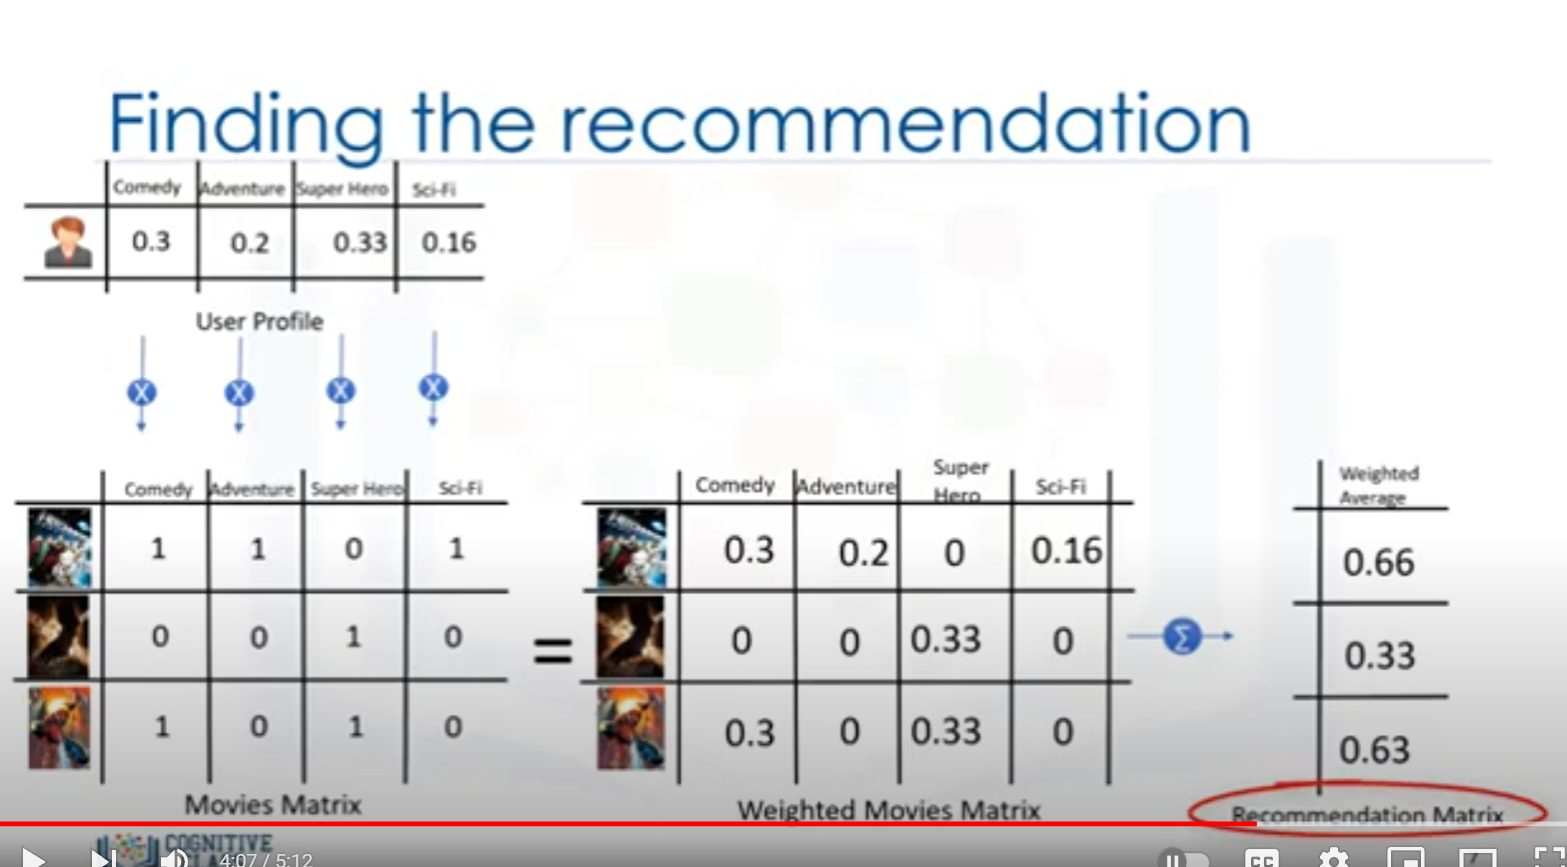

In [57]:
#Select podcasts to recommend, need to limit due to computational time
#here I am taking the top 500 values of the dataframe
podcasts_to_rate = podcasts_matrix.head(1000).copy()
weighted_podcasts_to_rate = podcasts_to_rate.copy()

In [58]:
for idx, row in podcasts_to_rate.iterrows():
    weighted_podcasts_to_rate.loc[idx] = row.values * user_profile_ratings.values

In [59]:
weighted_podcasts_to_rate.sum(axis=1).sort_values(ascending=False).head(25)

podcast_id
a091e36830404fae25ee50c4ca689427    3.166667
a064c2b97c5ad92a5430f3882c153215    3.166667
a0b77cf8f79bbcd3fd6bb4db8e640850    3.083333
a0d5d4de1f2803aadc7616ab40d62c7a    2.666667
a04d2de1e564e97f45ea9b33cfa6dbec    2.500000
a0702f9a99f7d4596af07d67538954b8    2.500000
a0403b0b3b9631a014fefd7b3284b7fe    2.416667
a080c9935210e457c50b1b66bd09cd95    2.333333
a0d790ff7527d77f49cde45b0e0e848b    2.250000
a05823ab6906e850712cd44a7d943147    2.250000
a0aa34f1035b3c33098ce124824eae50    2.250000
a0da72c7a7411eb4628090fe2426f758    2.250000
a07df6f20e958d717518055b570102d1    2.250000
a07aed5be9399f846d60cb5c6b88d472    2.250000
a0abdced6e1db69329b87123d5e56286    2.250000
a0b905338a6018a566d1ded912e83e4c    2.250000
a02f2e2be038067a5c88b1aee0f736d8    2.250000
a0c6f803ba65be7a56cea142ad496899    2.250000
a073597080a11982bb5a2e75eb819bc5    2.250000
a01c93b8620e0581d7d7b5311bd949c1    2.250000
a0d2101e418d6c787ed8cb42052aa2d8    2.250000
a00dc259c15606f5a894d17edd1b87a9    2.250000

In [62]:
podcast_id = 'a0b77cf8f79bbcd3fd6bb4db8e640850'
podcast_w_category[podcast_w_category['podcast_id'] == podcast_id]

podcast_id   podcast_title  \
48394  a0b77cf8f79bbcd3fd6bb4db8e640850  Pour Restraint   
48395  a0b77cf8f79bbcd3fd6bb4db8e640850  Pour Restraint   
48396  a0b77cf8f79bbcd3fd6bb4db8e640850  Pour Restraint   
48397  a0b77cf8f79bbcd3fd6bb4db8e640850  Pour Restraint   

                                category  
48394                               arts  
48395               arts-performing-arts  
48396                    society-culture  
48397  society-culture-personal-journals